# The Shape of Null Geodesics in the Schwarzschild Geometry
Based on https://web.physics.ucsb.edu/~gravitybook/math/schorbits.pdf.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
import scipy.integrate as integrate

### Variables to set

In [19]:
l = 5       # angular momentum

E = 0.015   # energy parameter

rst = 20    # starting radius

**Make sure these parameters are set so the orbit is classically allowed and doesn't start at a position where the value of the effective potential is greater than ``E``.**

### The potential

In [20]:
# Effective potential V_eff
W = lambda u: u**2 - 2*u**3

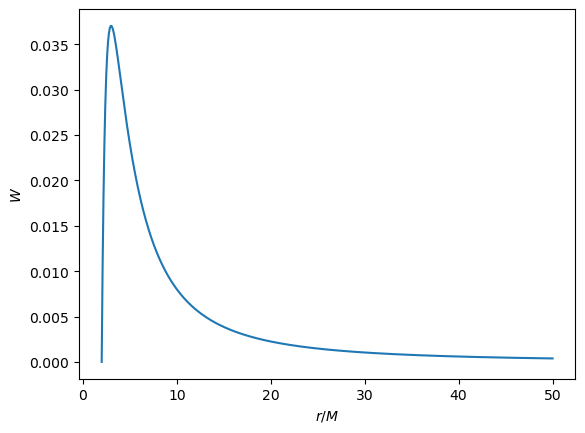

In [21]:
# Plot V_eff
r = np.linspace(2, 50, 500)
plt.plot(r, W(1/r))
plt.xlabel("$r/M$")
plt.ylabel("$W$")
plt.show()

In [22]:
dV = lambda u: 2*u - 6*u**2
umax = fsolve(dV, x0 = [100])
umax

array([0.33333333])

In [23]:
wmax = W(umax[0])
wmax

0.037037037037037035

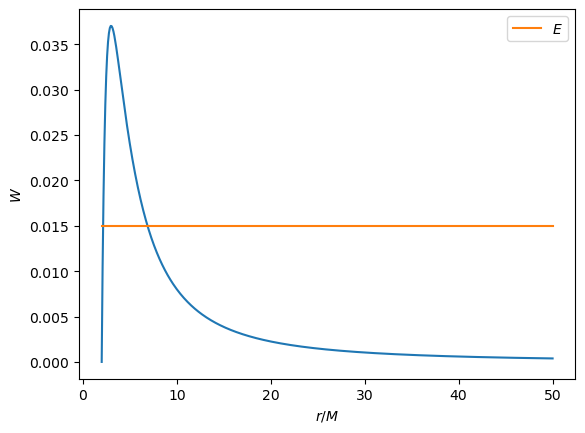

In [24]:
# Plot V_eff and E
r = np.linspace(2, 50, 500)
plt.plot(r, W(1/r))
plt.plot(r, E*np.ones_like(r), label="$E$")
plt.xlabel("$r/M$")
plt.ylabel("$W$")
plt.legend()
plt.show()

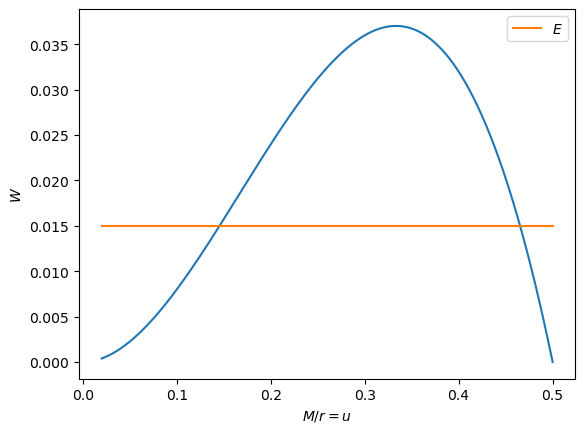

In [25]:
# Plot V_eff and E using u
u = np.linspace(1/50, 1/2, 500)
plt.plot(u, W(u))
plt.plot(u, E*np.ones_like(u), label="$E$")
plt.xlabel("$M/r = u$")
plt.ylabel("$W$")
plt.legend()
plt.show()

In [26]:
# Note: needs initial guesses based on the graph above
tp1, tp2 = fsolve((lambda x: E - W(x)), x0 = [0.1, 0.5])
tp1, tp2

(0.14544079897348644, 0.46536887528556165)

### Computing the orbit

I'm not including the unstable circular orbit at $r=3M$.

In [27]:
ust = 1/rst
eps = 1e-8

# Orbits coming from and going to infinity
testscatter = (E > 0) and (E < wmax) and (ust < tp1)
if testscatter:
    u1 = ust
    u2 = tp1 * (1-eps)
    while E-W(u2) < 0:
        u2 -= eps*tp2

# Plunge orbits coming from infinity going to r=2M
testplunge = E > wmax
if testplunge:
    u1 = ust
    u2 = 0.5 * (1 - eps)

print(testscatter, testplunge)
print(u1, u2)

assert testscatter or testplunge

True False
0.05 0.14544079751907843


If the parameters are set correctly, only one of the two options above should be ``True``. Reminder: the starting radius ``rst`` should be at a point where ``E > V`` (see the second graph).

In [28]:
def theta(u_array, E, l, u1):
    """Angle phi swept out from the innermost turning point."""
    result = []
    for u in u_array:
        integrated =  integrate.quad(
            lambda w: (l / 2**(1/2)) * (E-W(w))**(-1/2),
            u1, u
        )
        result.append(integrated[0])
    return np.array(result)

In [29]:
delphi = theta([u2], E, l, u1)  # total angle phi swept out between two endpoints of the orbit
delphi

array([5.53238432])

In [30]:
# z is a parameter which varies from 0 to norbit
n = lambda z: np.floor(z).astype(int)
zf = lambda z: z % 1
ua = lambda z: u1 * (1 - 2*zf(z)) + u2 * 2 * zf(z)
ub = lambda z: u1 * (2*zf(z) - 1) + 2 * u2 * (1-zf(z))
u = lambda z: np.where(zf(z) < 0.5, ua(z), ub(z))
phia = lambda z: 2*(n(z)) * delphi + theta(u(z), E, l, u1)
phib = lambda z: 2*(n(z)+1) * delphi - theta(u(z), E, l, u1)
accphi = lambda z: np.where(zf(z) < 0.5, phia(z), phib(z))      # accumulated angle as a function of position along the orbit
x = lambda z: np.cos(accphi(z)) / u(z)
y = lambda z: np.sin(accphi(z)) / u(z)

### Displaying the results

In [31]:
if testplunge:
    norbit = 0.5
else:
    norbit = 1
norbit

1

In [32]:
if norbit > 1:
    z = np.linspace(0, 1, 500)
    plt.plot(z, accphi(z))
    plt.xlabel("$z$")
    plt.ylabel("$\\phi$")
    plt.show()

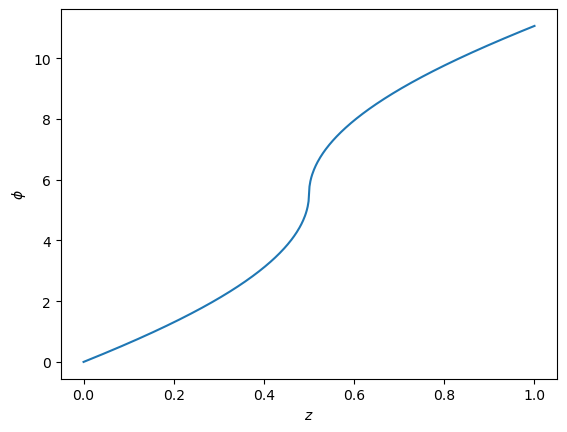

In [33]:
z = np.linspace(0, norbit, 500)
plt.plot(z, accphi(z))
plt.xlabel("$z$")
plt.ylabel("$\\phi$")
plt.show()

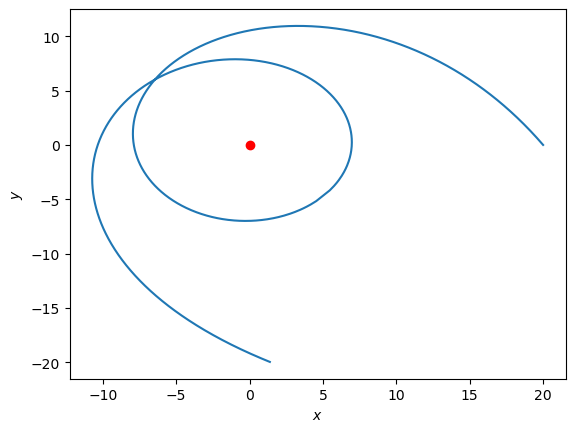

In [34]:
t = np.linspace(0, norbit, 3000)    # crank up this last value for smoother curves
plt.plot(x(t), y(t))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(0, 0, "ro")
plt.show()